In [1]:
import sklearn
from sklearn.datasets import load_digits

X, y =load_digits(return_X_y=True)
X.shape, y.shape

((1797, 64), (1797,))

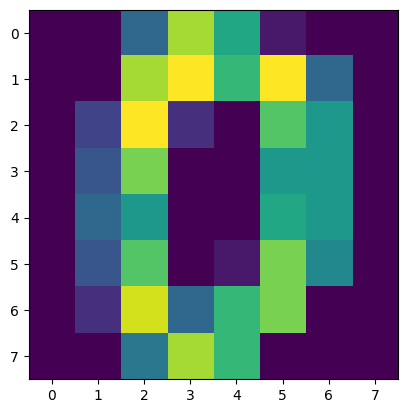

In [2]:
import matplotlib.pyplot as plt
reshaped_arr = X[0].reshape(8,8)
plt.imshow(reshaped_arr )

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver='lbfgs')
clf.fit(X_train, y_train)


c:\Users\giuli\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [6]:
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)
clf.score(X_test, y_test)

0.9629629629629629

In [7]:
from sklearn.decomposition import PCA
pca = PCA(0.95)
pca.fit(X_train)

X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

clf = LogisticRegression(solver='lbfgs')
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

c:\Users\giuli\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9592592592592593

In [8]:
!git clone https://github.com/zalandoresearch/fashion-mnist


Cloning into 'fashion-mnist'...


In [10]:
%cd fashion-mnist

c:\Users\giuli\Documents\GitHub\ML_DL_LABS\Lab1\fashion-mnist


In [11]:
from utils import mnist_reader
X_train, y_train = mnist_reader.load_mnist('data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('data/fashion', kind='t10k')

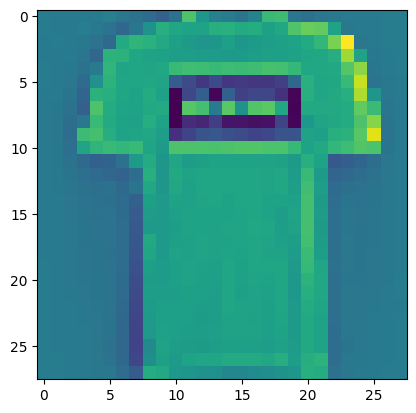

In [12]:
first_class = X_train[y_train==0,:] #select the first class
std = StandardScaler() 
first_class = std.fit_transform(first_class)#standardize data
plt.imshow(first_class[0,:].reshape(28,28)) #show a sample image



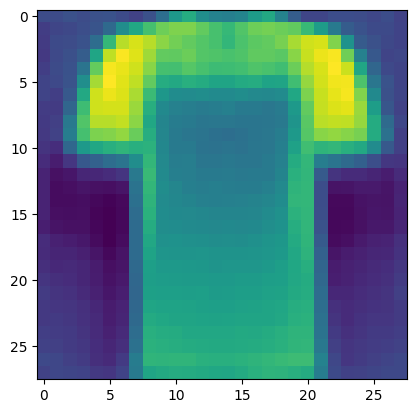

In [14]:
pca = PCA(n_components=6)
first_class_projection = pca.fit_transform(first_class) #project data onto the subspace generated by the first 6 components
reprojected_data=pca.inverse_transform(first_class_projection) #inverse the projection back to the original n-dimensional space
plt.imshow(reprojected_data[0,:].reshape(28,28)) #see what happened to the same image



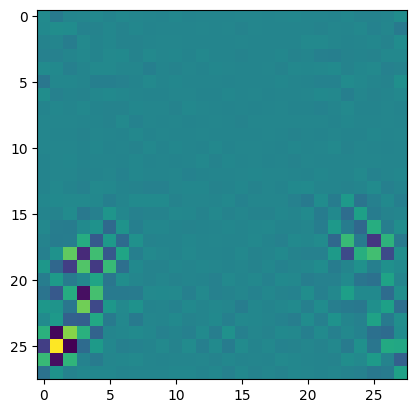

In [15]:
import numpy as np
pca_full = PCA()
pca_full.fit(first_class) #fit the pca with all principal components
V = pca_full.components_[-6:, :] #select the LAST 6 principal components (NB the matrix is transposed)
X_t = np.matmul(first_class, np.transpose(V)) #project data in the subspace generated by the last 6 PC
X_t_t = np.matmul(X_t, V) #project back the data
plt.imshow(X_t_t[0,:].reshape(28,28))#see what happened

## Pythorch

In [16]:
import torch

In [22]:
n=100
t1 = torch.rand(size=(n,n,n,n))
t2 = torch.rand(size=(n,n,n,n))
t1.cuda()
t2.cuda()

In [29]:
t = torch.add(t1, t2) #sum between tensors
s = torch.sum(t1) #sum between all elements of tensor

In [34]:
t3 = torch.matmul(t1,t2)